In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# Load the dataset
file_path = 'https://raw.githubusercontent.com/HojatS/StockPred/main/data.csv'
data = pd.read_csv(file_path)

# Display basic information and the first few rows of the dataset
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25160 entries, 0 to 25159
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  25160 non-null  object 
 1   Date     25160 non-null  object 
 2   Close    25160 non-null  float64
 3   Volume   25160 non-null  int64  
 4   Open     25160 non-null  float64
 5   High     25160 non-null  float64
 6   Low      25160 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 1.3+ MB
None
  Company       Date   Close    Volume    Open    High     Low
0    AAPL  7/17/2023  193.99  50520160  191.90  194.32  191.81
1    AAPL  7/14/2023  190.69  41616240  190.23  191.18  189.63
2    AAPL  7/13/2023  190.54  41342340  190.50  191.19  189.78
3    AAPL  7/12/2023  189.77  60750250  189.68  191.70  188.47
4    AAPL  7/11/2023  188.08  46638120  189.16  189.30  186.60


In [ ]:
df = data.loc[data['Company']=='AAPL']
print(df)

     Company       Date   Close     Volume    Open    High     Low
0       AAPL  7/17/2023  193.99   50520160  191.90  194.32  191.81
1       AAPL  7/14/2023  190.69   41616240  190.23  191.18  189.63
2       AAPL  7/13/2023  190.54   41342340  190.50  191.19  189.78
3       AAPL  7/12/2023  189.77   60750250  189.68  191.70  188.47
4       AAPL  7/11/2023  188.08   46638120  189.16  189.30  186.60
...      ...        ...     ...        ...     ...     ...     ...
2511    AAPL  7/24/2013   15.73  591624923   15.68   15.88   15.55
2512    AAPL  7/23/2013   14.96  354477618   15.21   15.25   14.95
2513    AAPL  7/22/2013   15.23  207648981   15.34   15.35   15.20
2514    AAPL  7/19/2013   15.18  268548901   15.47   15.50   15.16
2515    AAPL  7/18/2013   15.42  218632537   15.48   15.53   15.38

[2516 rows x 7 columns]


In [ ]:
AAPLdata = df.filter(['Close'])
AAPLdataset = AAPLdata.values
training_data_len = int(np.ceil( len(AAPLdataset) * .95 ))

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(AAPLdataset)

scaled_data

array([[1.        ],
       [0.98156734],
       [0.98072949],
       ...,
       [0.00150813],
       [0.00122884],
       [0.0025694 ]])

In [ ]:

train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([1.        , 0.98156734, 0.98072949, 0.97642853, 0.96698877,
       0.96994917, 0.98151148, 0.98782327, 0.98514215, 0.99145395,
       0.99988829, 0.97542311, 0.97352399, 0.96687706, 0.95129308,
       0.95916885, 0.96095626, 0.94397587, 0.94984081, 0.9493381 ,
       0.95542646, 0.94392001, 0.94034519, 0.94302631, 0.9272189 ,
       0.9250405 , 0.90967994, 0.917444  , 0.9195107 , 0.92716305,
       0.92235938, 0.90649612, 0.9067754 , 0.89633022, 0.88270122,
       0.87627772, 0.87471374, 0.88945987, 0.8948221 , 0.89420767,
       0.88102553, 0.87756242, 0.87756242, 0.88035525, 0.88694632,
       0.88588505, 0.87588672, 0.88554991, 0.8859409 , 0.8424845 ,
       0.85175669, 0.85784505, 0.86370999, 0.8642127 , 0.85711892,
       0.83114562, 0.83120147, 0.8399151 , 0.83818354, 0.84728816])]
[0.8527621069094565]

[array([1.        , 0.98156734, 0.98072949, 0.97642853, 0.96698877,
       0.96994917, 0.98151148, 0.98782327, 0.98514215, 0.99145395,
       0.99988829, 0.97542311, 0.973

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2331/2331 [==============================] - 88s 37ms/step - loss: 0.0012


In [ ]:
# Create the testing data set

test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = AAPLdataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

4/4 [==============================] - 1s 25ms/step


3.6988391055868917

<ipython-input-19-df9b8f1f51d3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


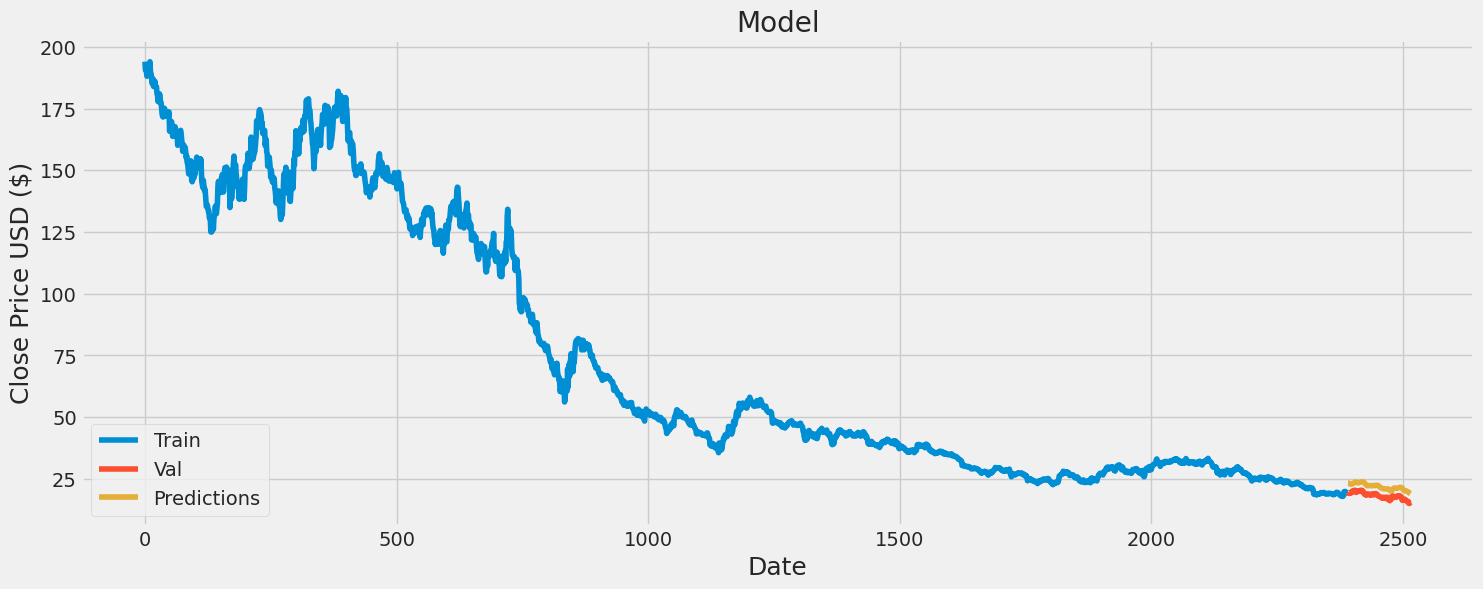

In [ ]:
# Plot the data
train = AAPLdata[:training_data_len]
valid = AAPLdata[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower left')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('https://raw.githubusercontent.com/HojatS/StockPred/main/data.csv')

# Initialize a dictionary to store models and scalers for each company
models = {}
scalers = {}

# Iterate over each unique company in the dataset
for company in data['Company'].unique():
    company_data = data.loc[data['Company'] == company]
    close_prices = company_data.filter(['Close']).values

    # Scale the data
    scaler = MinMaxScaler(feature_range=(0,1))
    scaled_data = scaler.fit_transform(close_prices)
    scalers[company] = scaler  # Store the scaler for later use

    # Prepare training data
    training_length = int(np.ceil(len(scaled_data) * .95))
    x_train = []
    y_train = []
    for i in range(60, training_length):
        x_train.append(scaled_data[i-60:i, 0])
        y_train.append(scaled_data[i, 0])

    x_train, y_train = np.array(x_train), np.array(y_train)
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

    # Build the LSTM model
    model = Sequential([
        LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)),
        LSTM(64, return_sequences=False),
        Dense(25),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model
    model.fit(x_train, y_train, batch_size=1, epochs=1)
    models[company] = model  # Store the model for later use

# Function to make predictions and plot for a given company
def predict_and_plot():
    company = input("Enter the company's name: ")
    if company not in models:
        print(f"No data available for {company}")
        return

    # Retrieve the model and scaler for the selected company
    model = models[company]
    scaler = scalers[company]

    # Prepare test data
    company_data = data.loc[data['Company'] == company]
    close_prices = company_data.filter(['Close']).values
    scaled_data = scaler.transform(close_prices)
    test_data = scaled_data[int(np.ceil(len(scaled_data) * .95)) - 60:]

    x_test = []
    for i in range(60, len(test_data)):
        x_test.append(test_data[i-60:i, 0])

    x_test = np.array(x_test)
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

    # Predict and inverse transform the predictions
    predictions = model.predict(x_test)
    predictions = scaler.inverse_transform(predictions)

    # Plotting
    actual = close_prices[len(close_prices) - len(predictions):]
    plt.figure(figsize=(16,6))
    plt.plot(actual, label='Actual Prices')
    plt.plot(predictions, label='Predicted Prices')
    plt.title(f'{company} Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.legend()
    plt.show()


In [1]:
# Calling predict_and_plot function, it will ask for a company name:
predict_and_plot()

NameError: name 'predict_and_plot' is not defined

In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv('https://raw.githubusercontent.com/HojatS/StockPred/main/data.csv')
data['Date'] = pd.to_datetime(data['Date'])
data.sort_values('Date', inplace=True)

# Define state space
def get_state(data, t, n_days):
    d = t - n_days + 1
    if d >= 0:
        block = data['Close'][d:t+1].tolist()
    else:
        block = (-np.ones(-d)).tolist() + data['Close'][0:t+1].tolist()
    res = []
    for i in range(n_days - 1):
        res.append(block[i + 1] - block[i])
    return np.array([res])

# Initialize Q-table
n_days = 5  # Number of days to consider for the state
actions = ['Buy', 'Sell', 'Hold']
q_table = dict()

# Define learning parameters
learning_rate = 0.1
discount_factor = 0.95
exploration_rate = 1.0
exploration_decay = 0.995
exploration_min = 0.01

# Simulation and training
portfolio_value = 10000
stock_held = 0
transaction_cost = 10

for episode in range(1000):
    state_index = get_state(data, 0, n_days)
    total_profit = 0

    for t in range(n_days, len(data) - 1):
        if str(state_index) not in q_table:
            q_table[str(state_index)] = [0 for _ in range(len(actions))]

        if random.random() < exploration_rate:
            action = random.choice(actions)
        else:
            action = actions[np.argmax(q_table[str(state_index)])]

        # Simulate action and observe reward
        next_state_index = get_state(data, t + 1, n_days)
        reward = 0
        current_price = data['Close'].iloc[t]
        next_price = data['Close'].iloc[t + 1]

        if action == 'Buy' and portfolio_value >= current_price + transaction_cost:
            stock_held += 1
            portfolio_value -= current_price + transaction_cost
        elif action == 'Sell' and stock_held > 0:
            stock_held -= 1
            portfolio_value += current_price - transaction_cost
            reward = next_price - current_price - 2 * transaction_cost  # Simplified reward
        elif action == 'Hold':
            reward = 0  # No cost or gain

        total_profit += reward

        # Update Q-table
        if str(next_state_index) not in q_table:
            q_table[str(next_state_index)] = [0 for _ in range(len(actions))]

        q_table[str(state_index)][actions.index(action)] = q_table[str(state_index)][actions.index(action)] + \
            learning_rate * (reward + discount_factor * np.max(q_table[str(next_state_index)]) - q_table[str(state_index)][actions.index(action)])

        state_index = next_state_index

    exploration_rate = max(exploration_min, exploration_rate * exploration_decay)
    print(f'Episode {episode + 1}, Total Profit: {total_profit}, Portfolio Value: {portfolio_value}')

# Plot results
plt.figure(figsize=(10, 5))
plt.xlabel('Episode')
plt.ylabel('Total Portfolio Value')
plt.plot([portfolio_value for _ in range(1000)])  # Adjust this line according to your data
plt.show()


Episode 1, Total Profit: -11608.799999999997, Portfolio Value: -4.28999999999788
Episode 2, Total Profit: 0, Portfolio Value: -4.28999999999788
Episode 3, Total Profit: 0, Portfolio Value: -4.28999999999788
Episode 4, Total Profit: 0, Portfolio Value: -4.28999999999788
Episode 5, Total Profit: 0, Portfolio Value: -4.28999999999788
Episode 6, Total Profit: 0, Portfolio Value: -4.28999999999788
Episode 7, Total Profit: 0, Portfolio Value: -4.28999999999788
Episode 8, Total Profit: 0, Portfolio Value: -4.28999999999788
Episode 9, Total Profit: 0, Portfolio Value: -4.28999999999788
Episode 10, Total Profit: 0, Portfolio Value: -4.28999999999788
Episode 11, Total Profit: 0, Portfolio Value: -4.28999999999788
Episode 12, Total Profit: 0, Portfolio Value: -4.28999999999788
Episode 13, Total Profit: 0, Portfolio Value: -4.28999999999788
Episode 14, Total Profit: 0, Portfolio Value: -4.28999999999788
Episode 15, Total Profit: 0, Portfolio Value: -4.28999999999788
Episode 16, Total Profit: 0, Po